# Assignment 4

### Note to Graders
Scroll all the way to the bottom for the "solution" to this assignement.
I ended up up asking two research questions because I felt that my first question would be biased by only selecting the Golden State Warriors. For my second question, I sampled from 6 different teams from each NBA region then created a Seaborn Jointplot that looks at player salary vs points per game for 2017-2018. To skip all the data munging and analysis, scroll all the way to the bottom for the chart I chose to answer my research question.

## Question 1: How does player PPG correlate with Salary for the Golden State Warriors?
#### Question 1a: What is the breakdown of Salary and PPG by player? What does it look like?
Note #1: I am not a sports person but I'm going to guess that this question is pretty obvious...  

Note #2: Sampling from just the Golden State Warriors is really not sufficient to answer the question whether player PPG is correlated with Salary, but for the purposes of this exercise let's just see what happens... 

- Ho: there is no correlation between player PPG and salary
- H1: there is a correlation between player PPG and salary


You can find the data here:
- Salary Data:
    - https://en.hispanosnba.com/salaries/golden-state-warriors
    - http://www.spotrac.com/nba/golden-state-warriors/cap/
    - https://www.basketball-reference.com/contracts/GSW.html
- Player Stats
    - https://basketball.realgm.com/nba/teams/Golden-State-Warriors/9/Stats


## Region 1: Bay Area, Golden State Warriors


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn-white')
# note: because of this course I've learned to loathe animations
#%matplotlib notebook
%matplotlib inline


In [2]:
salary = pd.read_csv('GSW_Salaries_2017_2018.csv')
salary

,PLAYER,2017-18,Unnamed: 2
0,Stephen Curry,34682550,NaN
1,Kevin Durant,25000000,NaN
2,Klay Thompson,17826150,NaN
3,Draymond Green,16400000,NaN
4,Andre Iguodala,14814815,NaN
5,Shaun Livingston,7692308,NaN
6,Nick Young,5192000,NaN
7,Zaza Pachulia,3477600,NaN
8,David West,2328652,NaN
9,JaVale McGee,2116955,NaN


In [3]:
salary.drop(salary.index[14], inplace=True) # Drop Thompson as he's no longer on the team
salary.drop(['Unnamed: 2'], axis=1, inplace=True)
salary.reset_index(inplace=True)
salary.drop('index', axis=1, inplace=True)

In [4]:
salary

,PLAYER,2017-18
0,Stephen Curry,34682550
1,Kevin Durant,25000000
2,Klay Thompson,17826150
3,Draymond Green,16400000
4,Andre Iguodala,14814815
5,Shaun Livingston,7692308
6,Nick Young,5192000
7,Zaza Pachulia,3477600
8,David West,2328652
9,JaVale McGee,2116955


In [5]:
gsw_stats = pd.read_csv('2017_2018_GSW_Reg_Season_Stats_Averages.csv')
gsw_stats.drop('#', axis=1, inplace=True)
gsw_stats

,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,Stephen Curry,GSW,51,32.0,8.4,16.9,0.495,4.2,9.8,0.423,...,0.921,3.0,2.2,0.7,4.4,5.1,6.1,1.6,0.2,26.4
1,Kevin Durant,GSW,68,34.2,9.3,18.0,0.516,2.5,6.1,0.419,...,0.889,3.0,2.0,0.5,6.4,6.8,5.4,0.7,1.8,26.4
2,Klay Thompson,GSW,73,34.3,7.9,16.1,0.488,3.1,7.1,0.440,...,0.837,1.8,1.6,0.4,3.4,3.8,2.5,0.8,0.5,20.0
3,Draymond Green,GSW,70,32.7,4.0,8.8,0.454,1.1,3.7,0.301,...,0.775,2.9,2.6,1.1,6.6,7.6,7.3,1.4,1.3,11.0
4,Quinn Cook,GSW,33,22.4,3.7,7.6,0.484,1.4,3.2,0.442,...,0.880,1.0,1.8,0.3,2.2,2.5,2.7,0.4,0.0,9.5
5,Nick Young,GSW,80,17.4,2.5,6.1,0.412,1.5,4.1,0.377,...,0.862,0.5,1.2,0.2,1.3,1.6,0.5,0.5,0.1,7.3
6,David West,GSW,73,13.7,3.0,5.2,0.571,0.0,0.1,0.375,...,0.759,1.1,1.6,0.9,2.4,3.3,1.9,0.6,1.0,6.8
7,Andre Iguodala,GSW,64,25.4,2.3,5.0,0.463,0.5,1.8,0.282,...,0.632,1.0,1.5,0.8,3.1,3.8,3.3,0.8,0.6,6.0
8,Omri Casspi,GSW,53,14.0,2.3,3.9,0.580,0.2,0.4,0.455,...,0.725,0.7,1.3,0.6,3.2,3.8,1.0,0.3,0.4,5.7
9,Shaun Livingston,GSW,71,15.9,2.4,4.8,0.501,0.0,0.1,0.000,...,0.820,0.8,1.6,0.5,1.4,1.8,2.0,0.5,0.3,5.5


In [6]:
df = pd.merge(salary, gsw_stats, how='inner', left_on='PLAYER', right_on='Player')

In [7]:
df.drop('Player', axis=1, inplace=True)

In [8]:
df.rename(index=str, columns={"2017-18": "Salary"}, inplace=True)

In [9]:
df.head()

,PLAYER,Salary,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,Stephen Curry,34682550,GSW,51,32.0,8.4,16.9,0.495,4.2,9.8,...,0.921,3.0,2.2,0.7,4.4,5.1,6.1,1.6,0.2,26.4
1,Kevin Durant,25000000,GSW,68,34.2,9.3,18.0,0.516,2.5,6.1,...,0.889,3.0,2.0,0.5,6.4,6.8,5.4,0.7,1.8,26.4
2,Klay Thompson,17826150,GSW,73,34.3,7.9,16.1,0.488,3.1,7.1,...,0.837,1.8,1.6,0.4,3.4,3.8,2.5,0.8,0.5,20.0
3,Draymond Green,16400000,GSW,70,32.7,4.0,8.8,0.454,1.1,3.7,...,0.775,2.9,2.6,1.1,6.6,7.6,7.3,1.4,1.3,11.0
4,Andre Iguodala,14814815,GSW,64,25.4,2.3,5.0,0.463,0.5,1.8,...,0.632,1.0,1.5,0.8,3.1,3.8,3.3,0.8,0.6,6.0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,17.0,8.037621e+06,1.016943e+07,14832.0,1312611.000,2328652.000,1.481482e+07,3.468255e+07
GP,17.0,5.682353e+01,2.149487e+01,1.0,53.000,65.000,7.000000e+01,8.000000e+01
MPG,17.0,1.868824e+01,9.973708e+00,1.3,13.800,15.900,2.540000e+01,3.430000e+01
FGM,17.0,3.300000e+00,2.678619e+00,0.0,2.000,2.300,3.700000e+00,9.300000e+00
FGA,17.0,6.594118e+00,5.335198e+00,1.0,3.400,4.800,7.600000e+00,1.800000e+01
FG%,17.0,4.861765e-01,1.413441e-01,0.0,0.463,0.500,5.710000e-01,6.270000e-01
3PM,17.0,8.705882e-01,1.284895e+00,0.0,0.000,0.200,1.400000e+00,4.200000e+00
3PA,17.0,2.300000e+00,2.967322e+00,0.0,0.100,1.000,3.700000e+00,9.800000e+00
3P%,17.0,2.324118e-01,1.906024e-01,0.0,0.000,0.282,4.190000e-01,4.550000e-01
FTM,17.0,1.294118e+00,1.598621e+00,0.0,0.600,0.700,1.100000e+00,5.500000e+00


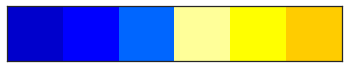

In [11]:
gsw_palette = ["#0000cc", "#0000ff", "#0066ff", "#ffff99", "#ffff00", "#ffcc00"]
sns.palplot(sns.color_palette(gsw_palette))

In [12]:
p = df.sort_values(by='PPG', axis=0, ascending=False)

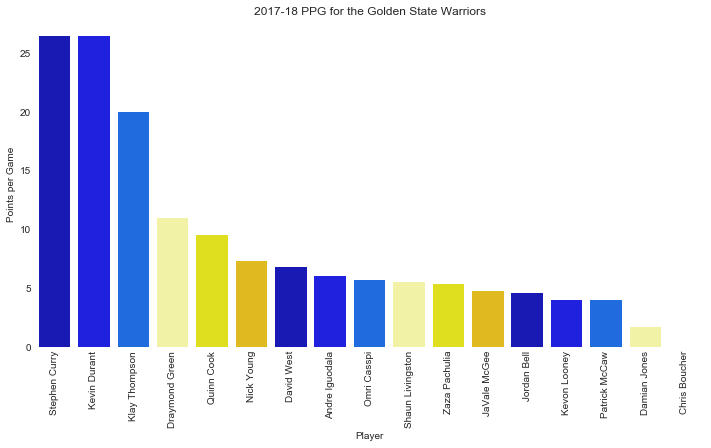

In [13]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
gsw_palette = ["#0000cc", "#0000ff", "#0066ff", "#ffff99", "#ffff00", "#ffcc00"]
cmap = sns.color_palette(gsw_palette)
g = sns.barplot(x='PLAYER', y='PPG', data=p, palette=cmap, alpha = 1)
sns.despine(left=True, bottom=True, right=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Points per Game")
g.set_xlabel("Player")
g.set_title('2017-18 PPG for the Golden State Warriors');

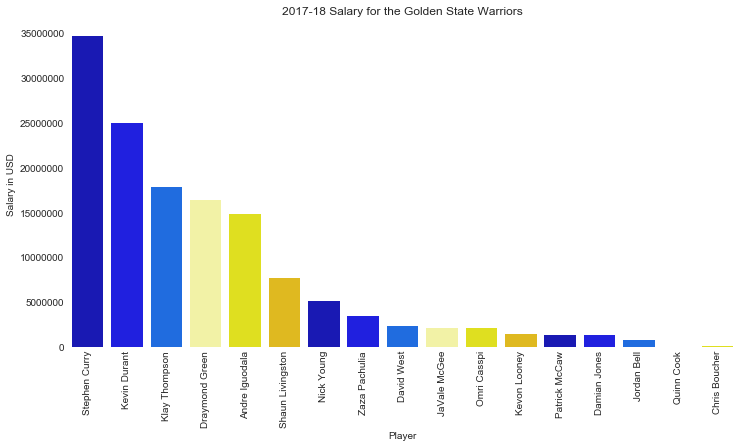

In [14]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
gsw_palette = ["#0000cc", "#0000ff", "#0066ff", "#ffff99", "#ffff00", "#ffcc00"]
cmap = sns.color_palette(gsw_palette)
g = sns.barplot(x='PLAYER', y='Salary', data=df, palette=cmap, alpha = 1)
sns.despine(left=True, bottom=True, right=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_ylabel("Salary in USD")
g.set_xlabel("Player")
g.set_title('2017-18 Salary for the Golden State Warriors');

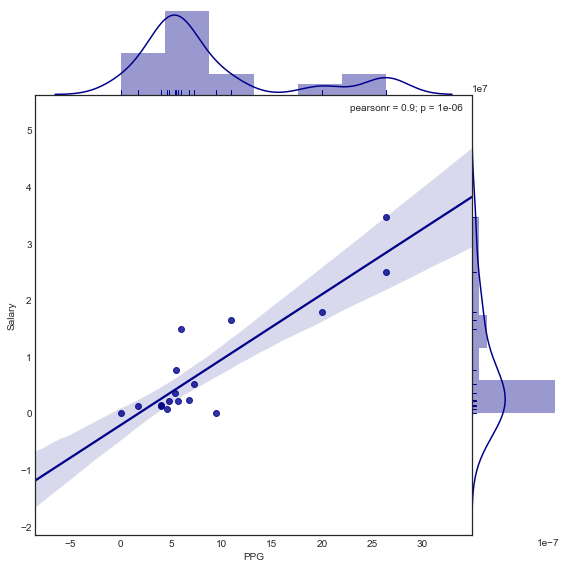

In [15]:
j = sns.jointplot(x='PPG', y='Salary', data=df, kind='reg', 
              space=0, marginal_kws=dict(bins=6, rug=True), 
              color='darkblue', size=8);

In [16]:
(pearsonr, pval) = stats.pearsonr(df['Salary'], df['PPG'])

In [17]:
print("Pearson R: {} P-Val: {}".format(pearsonr, pval))

Pearson R: 0.8978699035288137 P-Val: 1.0072497980930858e-06


## Discussion part 1

Starting with a bit of exploratory data analysis, we can see that our top three scorers are Steph Curry, Kevin Durant and and Klay Thompson. Looking further into our top scorers, we see that Steph Curry and Kevin Durant have the same number of points per game for the 2017-2018 season. Interestingly, Kevin Durant is making roughly 11 million less than Steph Curry. Not being a sports person, I have no idea why this is. Maybe Steph Curry has a better agent? (https://basketball.realgm.com/info/agent-client-list/Jeff-Austin/31)

Also, just based on two data points, you'd think if they are scoring the same, their salaries would be closer.
So how correlated is PPG to Salary? If we take a look at our Seaborn jointplot for PPG and Salary, there's a definite linear correlation. What's nice about Seaborn's jointplot functionality is that it will also give us Pearson's R and the associated p-value. We see that our Pearson's R is 0.898 which means that PPG and Salary are highly correlated. Our p-value is 0.000001 which means our correlation is significant at alpha = 0.05, 0.01 and even 0.001 
So for the question of PPG and Salary being correlated, we would reject the Null Hypothese in favor of the Alternate.

Using such a small sample size (1 team being the Golden State Warriors or 17 players), makes me a bit uncomfortable. lets take this a bit further and include more teams, and rerun our test to see if we continue to see such a highly significant correlation. 

## Question 2: In General, how does player PPG correlate with Salary?
#### Question 2a: What is the breakdown of Salary and PPG by player? What does it look like?

- Ho: there is no correlation between player PPG and salary
- H1: there is a correlation between player PPG and salary


You can find the data here:
- Salary Data:
    - https://en.hispanosnba.com/salaries/golden-state-warriors
    - http://www.spotrac.com/nba/golden-state-warriors/cap/
    - https://www.basketball-reference.com/contracts/GSW.html
    - http://hoopshype.com/salaries/boston_celtics/
    - https://www.basketball-reference.com/contracts/BOS.html
    - https://en.hispanosnba.com/salaries/boston-celtics
    - http://hoopshype.com/salaries/chicago_bulls/
    - https://www.basketball-reference.com/contracts/CHI.html
    - https://en.hispanosnba.com/salaries/chicago-bulls
    - http://hoopshype.com/salaries/dallas_mavericks/
    - https://www.basketball-reference.com/contracts/DAL.html
    - https://en.hispanosnba.com/salaries/dallas-mavericks
    - http://hoopshype.com/salaries/atlanta_hawks/
    - https://www.basketball-reference.com/contracts/ATL.html
    - https://en.hispanosnba.com/salaries/atlanta-hawks
    - http://hoopshype.com/salaries/denver_nuggets/
    - https://www.basketball-reference.com/contracts/DEN.html
    - https://en.hispanosnba.com/salaries/denver-nuggets
- Player Stats
    - https://basketball.realgm.com/nba/teams/Golden-State-Warriors/9/Stats
    - https://basketball.realgm.com/nba/teams/Boston-Celtics/2/stats/
    - https://basketball.realgm.com/nba/teams/Chicago-Bulls/4/Stats
    - https://basketball.realgm.com/nba/teams/Dallas-Mavericks/6/stats
    - https://basketball.realgm.com/nba/teams/Atlanta-Hawks/1/stats
    - https://basketball.realgm.com/nba/teams/Denver-Nuggets/7/Stats


## Region 2: 
    - San Francisco Bay Area, Golden State Warriors
    - Boston, Boston Celtics
    - Chicago, Chicago Bulls
    - Dallas, Dallas Mavericks
    - Atlanta, Alanta Hawks
    - Denver, Denver Nuggets
    


In [18]:
salaries = pd.read_csv('Salaries_2017_2018.csv')
salaries.rename(columns={"PLAYER":"Player"}, inplace=True)

In [19]:
playerstats = pd.read_csv('2017_2018_Reg_Season_Stats_Averages.csv')

In [20]:
df6 = pd.merge(playerstats, salaries, how='inner', left_on='Player', right_on='Player')
df6.rename(columns={"2017-18":"Salary"}, inplace=True)
df6.dropna(inplace=True)

In [21]:
df6.sort_values(by='Salary', axis=0, inplace=True, ascending=False)

In [22]:
df6.head()

,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,Salary
0,Stephen Curry,GSW,51,32.0,8.4,16.9,0.495,4.2,9.8,0.423,...,3.0,2.2,0.7,4.4,5.1,6.1,1.6,0.2,26.4,34682550.0
108,Paul Millsap,DEN,38,30.1,5.3,11.4,0.464,1.0,3.0,0.345,...,1.9,2.6,1.7,4.7,6.4,2.7,1.0,1.2,14.6,30769231.0
34,Gordon Hayward,BOS,1,5.2,1.0,2.0,0.500,0.0,1.0,0.000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,29727900.0
22,Al Horford,BOS,72,31.6,5.1,10.5,0.489,1.3,3.1,0.429,...,1.8,1.9,1.4,5.9,7.4,4.7,0.6,1.1,12.9,27734405.0
1,Kevin Durant,GSW,68,34.2,9.3,18.0,0.516,2.5,6.1,0.419,...,3.0,2.0,0.5,6.4,6.8,5.4,0.7,1.8,26.4,25000000.0


In [23]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,119.0,4.261345e+01,2.788661e+01,1.0,15.0000,52.000,6.900000e+01,82.0
MPG,119.0,1.813529e+01,9.380810e+00,1.3,10.2000,17.400,2.590000e+01,34.4
FGM,119.0,2.808403e+00,2.079300e+00,0.0,1.2000,2.400,4.000000e+00,9.3
FGA,119.0,6.228571e+00,4.413023e+00,0.0,2.6000,5.300,9.350000e+00,18.1
FG%,119.0,4.220840e-01,1.601187e-01,0.0,0.3835,0.444,4.995000e-01,1.0
3PM,119.0,8.058824e-01,8.305904e-01,0.0,0.0000,0.600,1.400000e+00,4.2
3PA,119.0,2.265546e+00,2.062927e+00,0.0,0.5000,1.600,3.700000e+00,9.8
3P%,119.0,2.668403e-01,1.875304e-01,0.0,0.0680,0.324,3.740000e-01,1.0
FTM,119.0,1.128571e+00,1.037038e+00,0.0,0.5000,0.800,1.600000e+00,5.5
FTA,119.0,1.472269e+00,1.234801e+00,0.0,0.5500,1.200,2.150000e+00,5.9


In [24]:
ppg = df6.sort_values(by='PPG', axis=0, inplace=False, ascending=False)

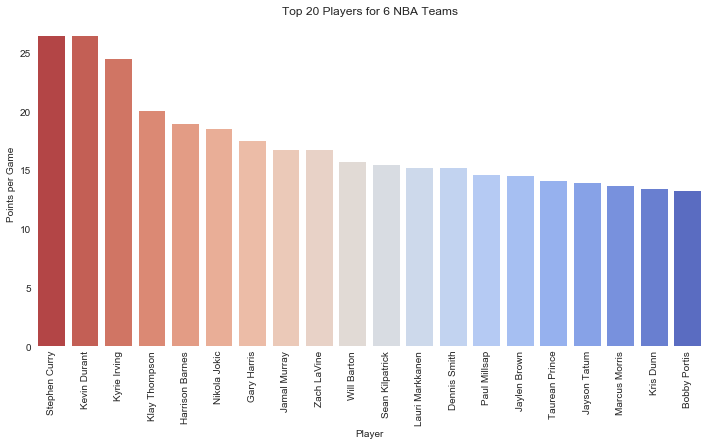

In [25]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x='Player', y='PPG', data=ppg.head(20), palette='coolwarm_r', alpha = 1)
sns.despine(left=True, bottom=True, right=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_ylabel("Points per Game")
g.set_xlabel("Player")
g.set_title('Top 20 Players for 6 NBA Teams');

In [26]:
dfbyteam = df6.groupby(by='Team').mean()
dfbyteam.sort_values(by='PPG', ascending=False, inplace=True)

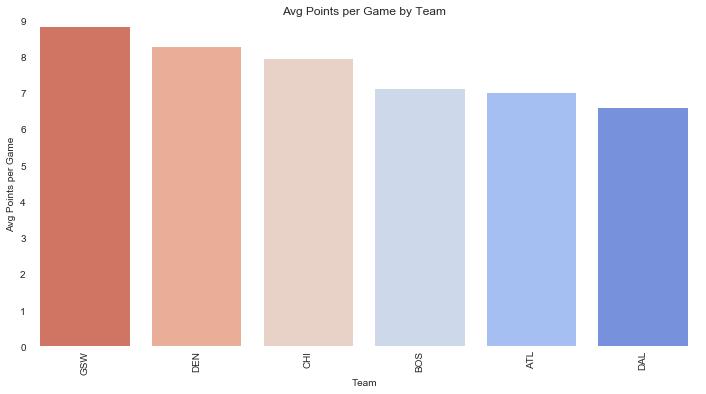

In [27]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x=dfbyteam.index, y='PPG', data=dfbyteam, palette='coolwarm_r', alpha = 1)
sns.despine(left=True, bottom=True, right=True)
g.set_ylim(0,9)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_ylabel("Avg Points per Game")
g.set_xlabel("Team")
g.set_title('Avg Points per Game by Team');

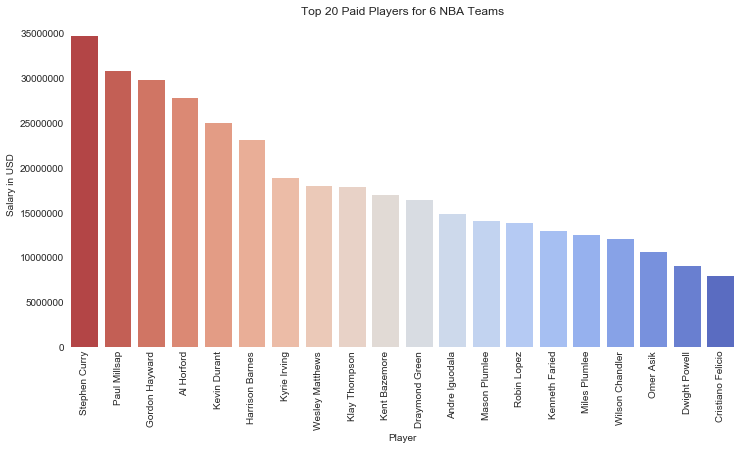

In [28]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x='Player', y='Salary', data=df6.head(20), palette='coolwarm_r', alpha = 1)
sns.despine(left=True, bottom=True, right=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_ylabel("Salary in USD")
g.set_xlabel("Player")
g.set_title('Top 20 Paid Players for 6 NBA Teams');

In [29]:
dfbyteamsalary = df6.groupby(by='Team').mean()
dfbyteamsalary.sort_values(by='Salary', ascending=False, inplace=True)

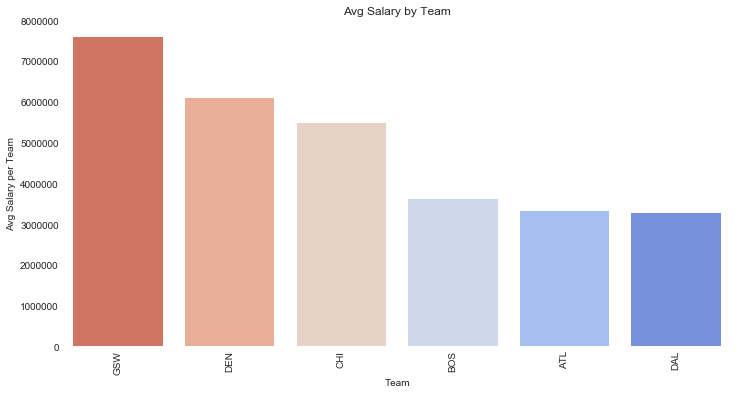

In [30]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x=dfbyteam.index, y='Salary', data=dfbyteamsalary, palette='coolwarm_r', alpha = 1)
sns.despine(left=True, bottom=True, right=True)
g.set_ylim(0,8000000)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_ylabel("Avg Salary per Team")
g.set_xlabel("Team")
g.set_title('Avg Salary by Team');

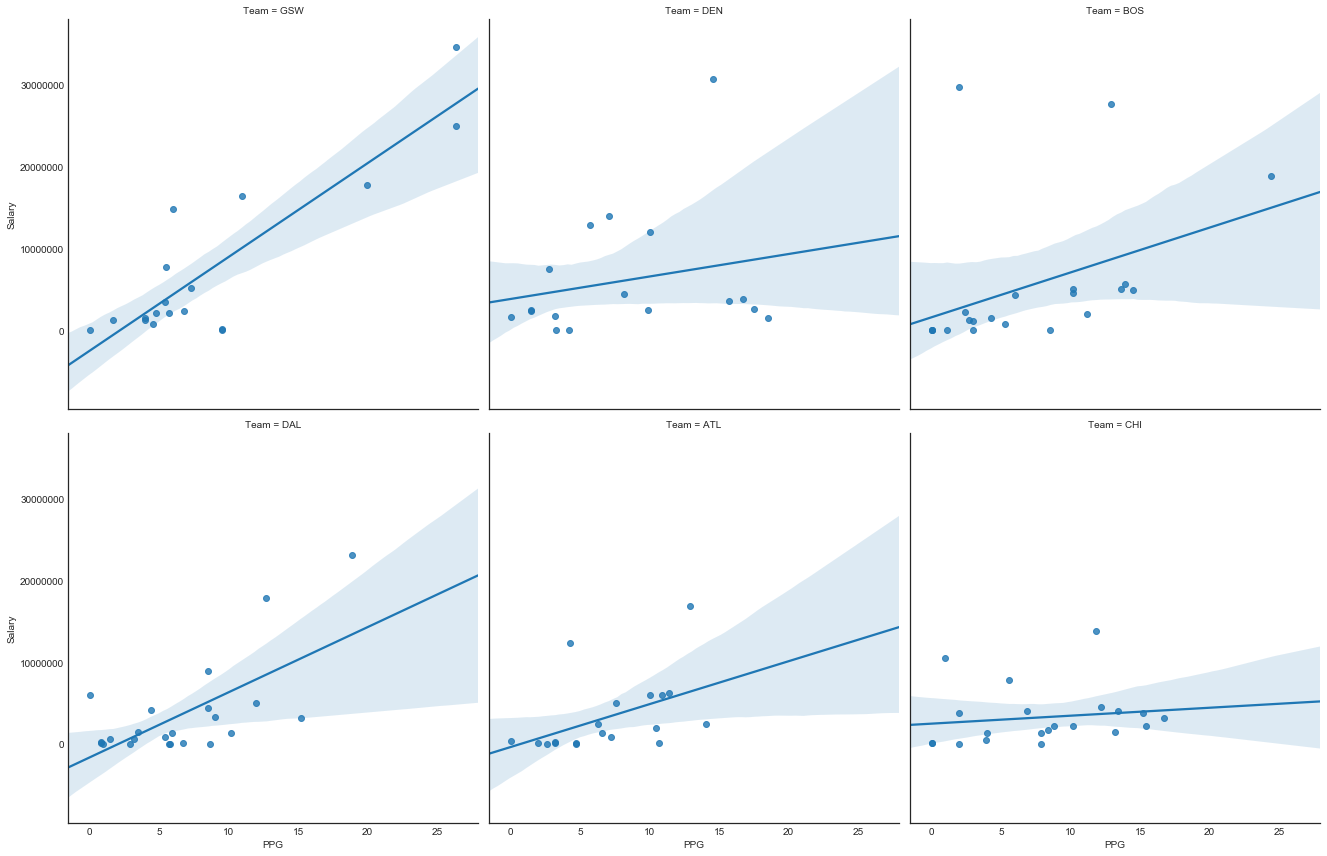

In [31]:
l = sns.lmplot(x='PPG', y='Salary', data=df6, col='Team', col_wrap=3, size=6)
plt.ticklabel_format(style='plain', axis='y')

Text(0.5,0.98,'Player Salary vs PPG for 2017-2018')

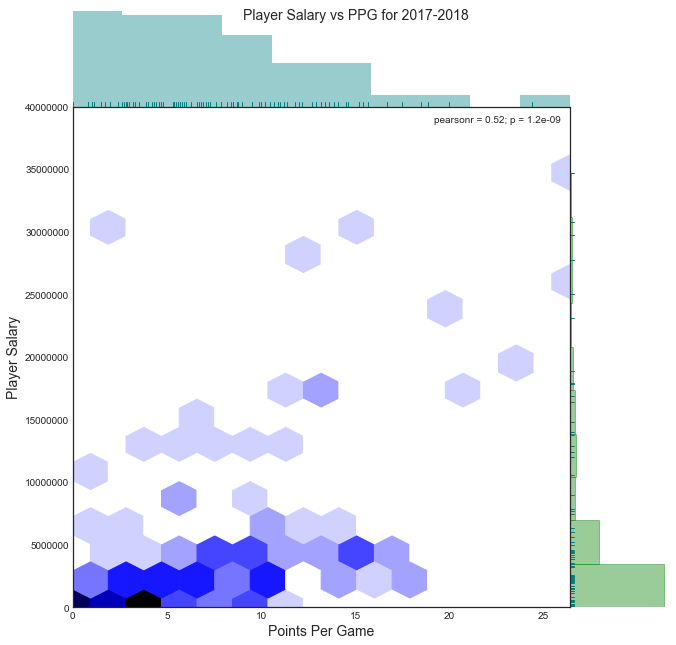

In [32]:

h = sns.jointplot(x='PPG', y='Salary', data=df6, kind='hex', 
              space=0, marginal_kws=dict(bins=10, rug=True, color='teal'), 
              color='darkblue', size=9)
h.set_axis_labels('Points Per Game', 'Player Salary', fontsize=14)
plt.setp(h.ax_marg_y.patches, color="green")
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,40000000)
plt.suptitle('Player Salary vs PPG for 2017-2018', fontsize=14)
#h.savefig("BasketballSalarybyPPG.png")

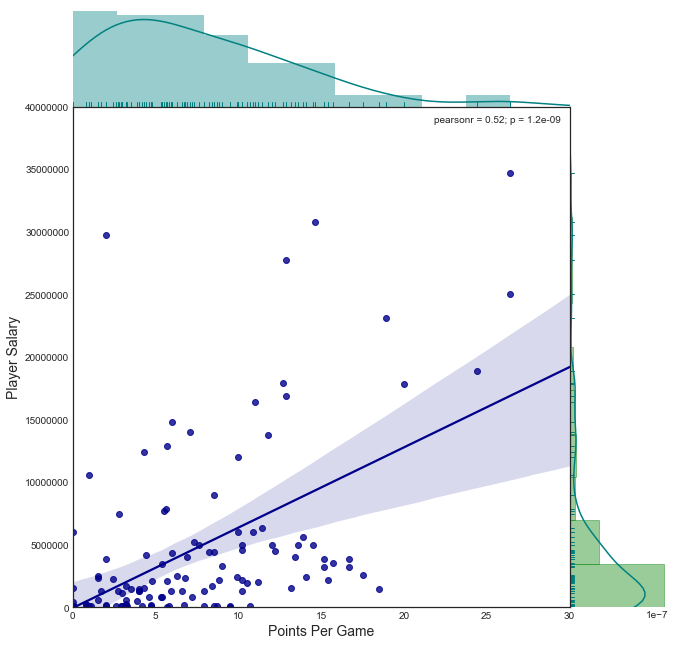

In [33]:
r = sns.jointplot(x='PPG', y='Salary', data=df6, kind='reg', 
              space=0, marginal_kws=dict(bins=10, rug=True, color='teal'), 
              color='darkblue', size=9)
r.set_axis_labels('Points Per Game', 'Player Salary', fontsize=14)
plt.setp(r.ax_marg_y.patches, color="green")
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,40000000)
plt.xlim(0,30);

In [34]:
(pearsonr, pval) = stats.pearsonr(df6['Salary'], df6['PPG'])
print("Pearson R: {} P-Val: {}".format(pearsonr, pval))

Pearson R: 0.5216031215014549 P-Val: 1.1818203195944583e-09


## Discussion part 2

After sampling from a few more teams our picture of Salary and PPG changes a bit. Doing some exploratory data analysis we see that out of the 6 teams sampled, Steph Curry and Kevin Durant are still the top scorers with Kyrie Irving, Klay Thompson and Harrison Barnes not very far behind. 

With more teams included in our dataset we can begin to investigate some groupby plots. Looking at PPG by team, we see that Golden State Warriors are the highest scoring team followed by the Denver Nuggets and Chicago Bulls. 

Looking at Salary, we see that Steph Curry is still highest paid among the 6 teams selected. Paul Millsap and Gordon Hayward aren't too far behind Steph Curry in terms of salary.

When we groupby average salary, we see that the Golden State Warriors, followed by Denver and Chicago, are the highest paid team out of the 6 teams sampled.

Finally, looking at the correlation between salary and PPG we see that four Pearson's R correlation coefficent drops to about 0.52 which is lower than our original of 0.9 with GSW only. Interestingly, our p-value (1.182e-09) is much smaller when we include a larger sample. We would still reject the Null Hypothis in favor of the alternate, but this seems strange. You would think our p-value would be bigger. After doing some investigation (google, stackexchange, etc), it seems that this is fairly common. As the sample sizes increase you get a smaller p-value. If you have a large enough sample size, "everything becomes significant".


Good discussion here: https://www.researchgate.net/post/Question_about_Correlation_Analysis_I_got_the_significant_p005_however_the_R_only_indicated_a_weak_correlation_r015_Why

Related:
https://stats.stackexchange.com/questions/93757/pearson-correlation-coefficient-test-low-r-and-low-p-value?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stats.stackexchange.com/questions/133488/interpreting-high-p-value-and-low-correlation-value

## Finally!
#### For the acutal Assignment, I chose the Seaborn Hexgrid-Jointplot  to answer my research question.
Why not a simple linear regression plot? I could have done that but I think the the hex plot is much more insightful, and functional than a standard linear regression jointplot. Looking at the plot we still get a scatter plot effect with the hex-points plus we are able to quickly determine the density of the salary vs ppg. We can see from the plot below, many players are making less than roughly 5 million and scoring rougly fewer than 10 points per game. We can also see that the distributions of player salary and player PPG are positively skewed. In addition to skewness we are presented with a rug plot to, again, show the desnity and spread of salary and PPG. Finally to answer my research question, Seaborn jointplots give us the Pearson's R score and a p-value. We can see from the original question, our correlation coefficient was 0.9. When we sampled from 6 different teams, the correlation coefficient went down to 0.52. So while we don't have as strong a correlation as before, we can still say that PPG and Salary are correlated. 






<img src="BasketballSalarybyPPG.png">